In [1]:

import torch
from PIL import Image
from diffusers.utils import make_image_grid

from models.image_merging import StableDiffusionImageMergingPipeline


In [2]:
pipe = StableDiffusionImageMergingPipeline.from_pretrained(
    "lambdalabs/sd-image-variations-diffusers", revision="v2.0",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")
pipe.enable_xformers_memory_efficient_attention()

image_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


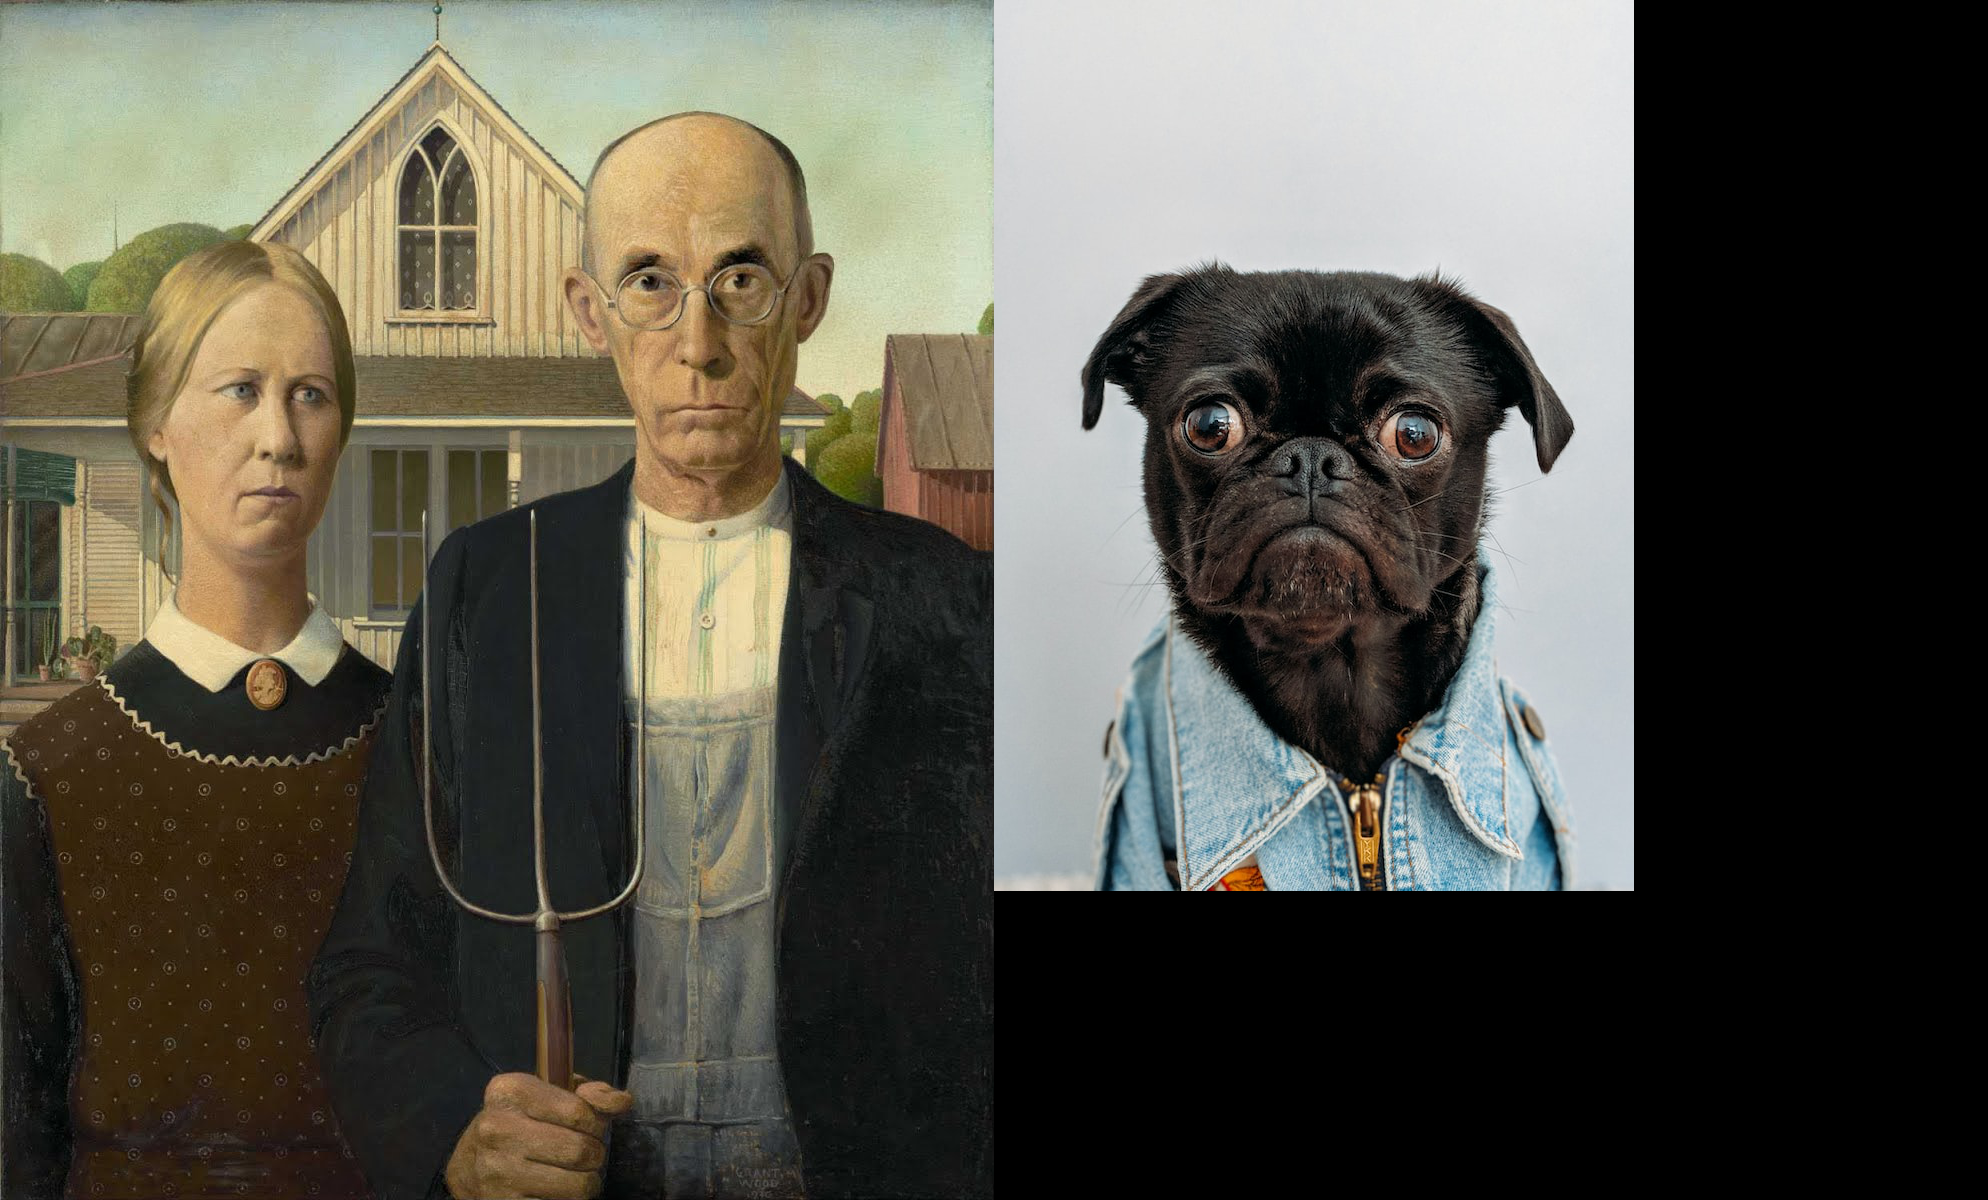

In [3]:
source_image = Image.open('./data/imgs/image0.png')
merge_image = Image.open('./data/imgs/image1.jpg')

make_image_grid([source_image, merge_image], 1, 2)

  0%|          | 0/50 [00:00<?, ?it/s]

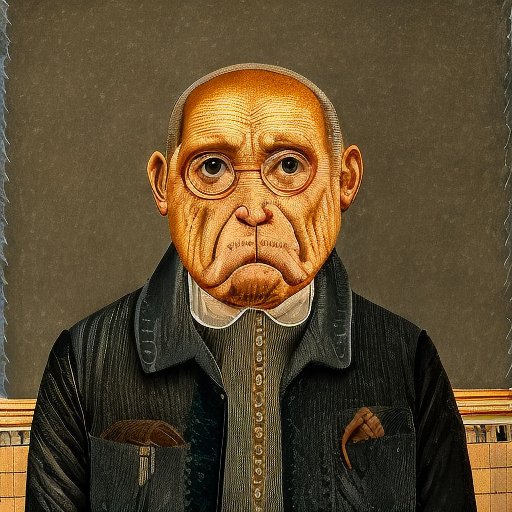

In [4]:
generator = torch.Generator(device="cuda").manual_seed(42)
out = pipe(source_image, merge_image, generator=generator, guidance_scale=3, num_inference_steps=50)
out["images"][0]